In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Add_sales_data_2018.csv')
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [3]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [6]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

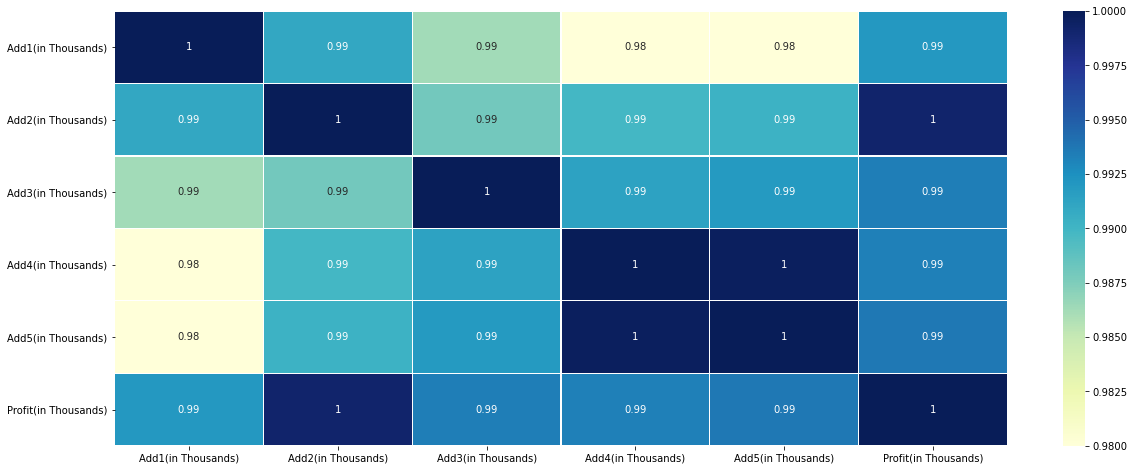

In [7]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.98,vmax=1,annot=True,linewidth=0.25,cmap='YlGnBu')
plt.show()

From this heatmap it is clear that the varibles have high positive correlation value like 1,0.99,0.98.Therefore there is a strong relationship between the varibles.So if the amount spend on advertisement is high,then higher will be the profit since they increases togetherly.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [8]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [9]:
y=df['Profit(in Thousands)']
X=df.drop(['Date','Profit(in Thousands)'],axis=1) #droping date since it is unwanted 

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [11]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [12]:
model = lr.fit(X_train,y_train)
y_prediction = model.predict(X_test)

In [13]:
print(y_test)

52     4494.144
181    5921.116
5      4404.686
18     4190.965
188    5880.541
         ...   
198    5435.316
143    5134.657
24     4435.174
30     4598.292
135    4979.399
Name: Profit(in Thousands), Length: 62, dtype: float64


In [14]:
print(y_prediction)

[4494.144 5921.116 4404.686 4190.965 5880.541 5728.804 5225.14  5017.503
 5518.561 4513.6   4464.11  5140.372 4760.877 5038.222 4606.34  5730.999
 4922.845 4470.775 4480.363 5065.652 5043.705 5491.792 4968.03  5792.175
 6137.8   5247.011 5137.534 5373.275 5212.949 4898.776 5972.337 5745.806
 5153.977 5805.521 4763.69  4175.677 5938.474 4915.682 4523.704 5113.337
 4648.627 4350.683 4916.064 4934.682 5108.626 5167.878 4451.999 4980.446
 5177.61  5861.83  4425.005 4887.296 5267.657 5088.455 5163.693 5430.79
 5250.775 5435.316 5134.657 4435.174 4598.292 4979.399]


In [15]:
from sklearn.metrics import mean_squared_error
print('MSE is ', mean_squared_error(y_test,y_prediction))

MSE is  2.254734250346156e-24


In [16]:
from sklearn.metrics import r2_score
r_sq = r2_score(y_test,y_prediction)
r_sq

1.0

In [17]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 1.   12.38  3.5   1.    0.9 ]
Intercept: 2.7284841053187847e-12


Since the the r squared value is 1 and MSE value is 2.25 it is almost a perfect model for predicting the profit.Also here the y-intercept is 2.728 and the slopes are 1,12.38,3.5,1,.9 for each add respectively.Knowing this value with the model we can predict profit for any amount in advertisement.

# 3) Predict the profit generated by the company, if they wish to spend the following amount for advertisement Add1(in Thousands)-290,Add2(in Thousands)-312,Add3(in Thousands)-309,Add4(in Thousands)-298,Add5(in Thousands)-320

In [18]:
predictions_2 = model.predict([[290, 312, 309, 298, 320]])
predictions_2

array([5820.06])

 5820.06 is the predicted profit if they wish to spend the amounts 290,312,309,298,320 in each advertising companies.